In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbs
import datetime
import pymc as pm
import statsmodels.api as sm
from scipy.stats.stats import pearsonr
from pandas.tseries.offsets import BDay
import matplotlib as mpl
pd.options.display.max_columns = 50

c:\users\pc\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels-0.8.0-py3.6-win32.egg\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import pickle
def save_obj(obj, name):
    with open('C:/Users/pc/Desktop/SG_project/Pickled/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj(name):
    with open('C:/Users/pc/Desktop/SG_project/Pickled/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
dictionary_commodities = load_obj("dictionary_commodities")
dictionary_financials = load_obj("dictionary_financials")

In [4]:
dictionary_commodities.keys()

dict_keys(['CORN - CHICAGO BOARD OF TRADE', 'OATS - CHICAGO BOARD OF TRADE', 'COTTON NO. 2 - ICE FUTURES U.S.', 'ROUGH RICE - CHICAGO BOARD OF TRADE', 'LEAN HOGS - CHICAGO MERCANTILE EXCHANGE', 'LIVE CATTLE - CHICAGO MERCANTILE EXCHANGE', 'FEEDER CATTLE - CHICAGO MERCANTILE EXCHANGE', 'SOYBEANS - CHICAGO BOARD OF TRADE', 'SOYBEAN OIL - CHICAGO BOARD OF TRADE', 'SOYBEAN MEAL - CHICAGO BOARD OF TRADE', 'COCOA - ICE FUTURES U.S.', 'SUGAR NO. 11 - ICE FUTURES U.S.', 'COFFEE C - ICE FUTURES U.S.', 'CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE EXCHANGE', 'GOLD - COMMODITY EXCHANGE INC.', 'NATURAL GAS - NEW YORK MERCANTILE EXCHANGE', 'NATURAL GAS ICE HENRY HUB - ICE FUTURES ENERGY DIV', 'COPPER-GRADE #1 - COMMODITY EXCHANGE INC.', 'FRZN CONCENTRATED ORANGE JUICE - ICE FUTURES U.S.'])

In [5]:
dictionary_financials.keys()

dict_keys(['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE', 'VIX FUTURES - CBOE FUTURES EXCHANGE', 'EURO FX - CHICAGO MERCANTILE EXCHANGE', '3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE', 'BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE', 'JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE', '2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', '10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', '5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', 'CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE'])

In [6]:
df = load_obj("df_generic1_prices")
df.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,gold_futeres_price,coffee_futeres_price,nut_gas_ice_futeres_price,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price,SG_CTA
2010-10-01,1142.25,24.75,120.07,0.4145,1.2565,2.5097,95.845,689.25,95.950,111.800,1316.1,181.10,46.76,3.797,81.58,43.49,465.75,155.65,23.36,369.05,109.757812,120.906250,126.078125,2010.976434
2010-10-04,1134.75,25.15,120.03,0.4066,1.2241,2.4758,95.890,683.00,95.100,110.500,1315.4,172.50,46.38,3.727,81.47,43.10,471.50,154.65,22.99,366.40,109.773438,121.093750,126.468750,2005.892686
2010-10-05,1154.75,23.65,120.28,0.3987,1.1917,2.4722,95.875,701.00,95.550,109.550,1338.9,177.00,47.12,3.743,82.82,43.47,491.00,158.50,23.74,372.65,109.773438,121.187500,126.640625,2030.601272
2010-10-06,1155.75,23.25,120.65,0.3829,1.1593,2.3976,95.925,697.50,94.850,109.200,1346.4,175.55,46.77,3.865,83.23,43.44,488.50,150.45,23.54,375.30,109.828125,121.359375,127.093750,2041.925935
2010-10-07,1156.50,22.95,121.52,0.3512,1.1270,2.3833,95.925,699.50,95.125,108.925,1333.9,173.45,46.54,3.617,81.67,43.79,498.25,151.20,25.16,367.95,109.882812,121.484375,127.140625,2042.460920


In [7]:
df.isnull().sum()

snp_futeres_price                   0
vix_futeres_price                   0
yen_futeres_price                   0
two_years_us_yield                  0
five_years_us_yield                 0
ten_years_us_yield                  0
euro_dollar_futeres_price           0
wheat_hrw_futeres_price             0
live_cattle_futeres_price           0
feeder_cattle_futeres_price         0
gold_futeres_price                  0
coffee_futeres_price                0
nut_gas_ice_futeres_price           0
nut_gas_nymex_futeres_price         0
crude_oil_ls_futeres_price          0
soybean_oil_futeres_price           0
corn_futeres_price                  0
frzn_orange_juice_futures_price     0
sugar_futures_price                 0
copper_futures_price                0
two_tnote_futeres_price             0
five_tnote_futeres_price            0
ten_tnote_futeres_price             0
SG_CTA                             14
dtype: int64

In [8]:
def get_change_bool(df):
    # create difference column
    df = pd.DataFrame(df)
    df["change"] = df - df.shift(1)
    # drop first row because nan is now present in the "change" column 
    df.drop(df.index[0], inplace=True)
    df["change_bool"] = 0
    # mark days with positive or no change as 0
    # mark days with negative change as 1
    
    df.loc[df["change"] < 0, "change_bool"] = 1
    # crop the data to the same time period as cftc data
    start = load_obj("cftc_index")[0]; end = load_obj("cftc_index")[-1]
    df = df.loc[start:end]
    return df

In [9]:
def get_neg_ret(df):
    df = get_change_bool(df)
    # parameter "n" is the number of consecutive days with negative return
    # column consec_day represents for how many consecutive days there was a decline 
    # column neg_return represents negative cumultive sum 
    if not isinstance(df, pd.DataFrame):
        df = pd.DataFrame(df)
    
    df["cumsum_bool"] = df['change_bool'].cumsum() 
    df["consec_days"] = df['cumsum_bool'].sub(df['cumsum_bool'].mask(df['change_bool'] != 0).ffill(), 
                                        fill_value=0).astype(int)  
    
    df["cumsum_bool_ret"] = df['change'].cumsum() 
    df["neg_return_cum"] = df['cumsum_bool_ret'].sub(df['cumsum_bool_ret'].mask(df['change_bool'] != 0).ffill(), 
                                        fill_value=0) 

    df.drop(["cumsum_bool_ret", 'cumsum_bool', 'change_bool'], 1, inplace=True)

    df["pct_neg_ret_cum"] = round(df["neg_return_cum"]/df[df.columns[0]] * 100, 4)
    df["pct_ret"] = round(df["change"]/df[df.columns[0]] * 100, 4)
    
    return df

In [10]:
def get_neg_df(df, n):
    from pandas.tseries.offsets import BDay
    df = get_neg_ret(df)
    df_return = pd.DataFrame()
    #ranges_list = []
    for index in df[df['consec_days'] == n].index:
        # index is the last day in the sequence 
        start = index - BDay(n-1)
        df_return = pd.concat([df_return, df.loc[start:index]])
        #ranges_list.append([start, index])
    return df_return#, ranges_list 

In [147]:
def map_neg_ret(df_positions, df, n):
    #   
    #   performing a lot of arithmetic to dates, going to check for holidays, othersiwe will not be able to index df
    #   will try to index range within 2 days before and after holiday
    #
    #
    #   class USTradingCalendar is taken from 
    #   https://stackoverflow.com/questions/33094297/create-trading-holiday-calendar-with-pandas      // Pierre Boutquin
    #
    ##############################################################################
    from pandas.tseries.offsets import BDay
    import datetime as dt
    from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, \
        USMartinLutherKingJr, USPresidentsDay, GoodFriday, USMemorialDay, \
        USLaborDay, USThanksgivingDay

    class USTradingCalendar(AbstractHolidayCalendar):
        rules = [
            Holiday('NewYearsDay', month=1, day=1, observance=nearest_workday),
            USMartinLutherKingJr,
            USPresidentsDay,
            GoodFriday,
            USMemorialDay,
            Holiday('USIndependenceDay', month=7, day=4, observance=nearest_workday),
            USLaborDay,
            USThanksgivingDay,
            Holiday('Christmas', month=12, day=25, observance=nearest_workday)
        ]

    def get_trading_close_holidays(year):
        inst = USTradingCalendar()

        return inst.holidays(dt.datetime(year-1, 12, 31), dt.datetime(year, 12, 31))

    if __name__ == '__main__':
        pass    
    ##############################################################################
    neg_df = get_neg_df(df, n)

        
    df_return = neg_df
    df_return["position_change"] = 0
    # 0: Monday, 6: Sunday 
    #print(len(df_return.index))
    if len(df_return.index) != 0:
        mondays = df_return.index[df_return.index.dayofweek == 0]
        tuesdays = df_return.index[df_return.index.dayofweek == 1]
        fridays = df_return.index[df_return.index.dayofweek == 4]
    else:
        return df_return
    
    
    for tuesday in tuesdays:
        year = int(tuesday.year)
        if tuesday in get_trading_close_holidays(year):
            try:
                tuesday = tuesday - BDay(1)
                df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
            except:
                try:
                    tuesday = tuesday + BDay(1)
                    df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                except:
                    try:
                        tuesday = tuesday - BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                    except:
                        tuesday = tuesday + BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
        else:
            df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
    
    for monday in mondays:
        
        tuesday = monday + BDay(1)
        year = int(tuesday.year)
        if tuesday in get_trading_close_holidays(year):
            #print("HHHHHHHOOOOOOliday MONDAY")
            #print(tuesday)
            # find a day which will work 
            try:
                tuesday = tuesday - BDay(1)
                df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
            except:
                try:
                    tuesday = tuesday + BDay(1)
                    df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                except:
                    try:
                        tuesday = tuesday - BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                    except:
                        tuesday = tuesday + BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]

            
            df_return.loc[tuesday, df_return.columns[0]] = df.loc[tuesday]
            tuesday_ret = df.loc[tuesday] - df.loc[df.index[df.index.get_loc(tuesday)-1]]
            tuesday_ret_pct = tuesday_ret/df.loc[tuesday]*100
#             print("pct tuesday",tuesday_ret_pct)
#             print("tueday",tuesday_ret)
            df_return.loc[tuesday, "change"] = tuesday_ret

            if pd.isnull(df_return.loc[tuesday, "consec_days"]):
                df_return.sort_index(inplace=True)
#                 print("NANANANAN MMMMMMMMMMMMM")
#                 print("SSSSSSSSSSSSSSSSSSSSSSSS", df_return["neg_return_cum"]\
#                                     .loc[df_return.index[df_return.index.get_loc(tuesday)-1]])
#                 print("IIIIIIIIIIIIIIII", df_return.index[df_return.index.get_loc(tuesday)-1])
                
                df_return.loc[tuesday, "neg_return_cum"] = df_return["neg_return_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return["pct_neg_ret_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                consec_days = df_return["consec_days"].loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                #print("consec days",consec_days)
                if df_return.loc[monday, "consec_days"] == n:
#                     print("ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ")
                    df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + tuesday_ret
                    df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + tuesday_ret_pct
                if tuesday_ret < 0:
                    consec_days += 1
                
                df_return.loc[tuesday, "consec_days"] = consec_days.astype(int)
                df_return.loc[tuesday, "pct_ret"] = tuesday_ret_pct

            
            
        else:
            
            
            
            
            df_return.loc[tuesday, df_return.columns[0]] = df.loc[tuesday]
            tuesday_ret = df.loc[tuesday] - df.loc[df.index[df.index.get_loc(tuesday)-1]]
            tuesday_ret_pct = tuesday_ret/df.loc[tuesday]*100
#             print("pct tuesday",tuesday_ret_pct)
#             print("tueday",tuesday_ret)
            df_return.loc[tuesday, "change"] = tuesday_ret

            if pd.isnull(df_return.loc[tuesday, "consec_days"]):
                df_return.sort_index(inplace=True)
#                 print("NANANANAN MMMMMMMMMMMMM")
#                 print("SSSSSSSSSSSSSSSSSSSSSSSS", df_return["neg_return_cum"]\
#                                     .loc[df_return.index[df_return.index.get_loc(tuesday)-1]])
#                 print("IIIIIIIIIIIIIIII", df_return.index[df_return.index.get_loc(tuesday)-1])
                
                df_return.loc[tuesday, "neg_return_cum"] = df_return["neg_return_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return["pct_neg_ret_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                consec_days = df_return["consec_days"].loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
#                 print("consec days",consec_days)
                if df_return.loc[monday, "consec_days"] == n:
#                     print("ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ")
                    df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + tuesday_ret
                    df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + tuesday_ret_pct
                if tuesday_ret < 0:
                    consec_days += 1
                
                df_return.loc[tuesday, "consec_days"] = consec_days.astype(int)
                df_return.loc[tuesday, "pct_ret"] = tuesday_ret_pct

            
                        
            

    
    for friday in fridays:
        tuesday = friday + BDay(2)
        year = int(tuesday.year)
        if tuesday in get_trading_close_holidays(year):
            # find a day which will work 
            try:
                tuesday = tuesday - BDay(1)
                df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
            except:
                try:
                    tuesday = tuesday + BDay(1)
                    df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                except:
                    try:
                        tuesday = tuesday - BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
                    except:
                        tuesday = tuesday + BDay(2)
                        df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]

            ############################################################
            df_return.loc[tuesday, df_return.columns[0]] = df.loc[tuesday]
            monday_ret = df.loc[df.index[df.index.get_loc(tuesday)-1]] - df.loc[df.index[df.index.get_loc(tuesday)-2]]
            monday_ret_pct = monday_ret/df.loc[tuesday]*100
#             print("pct monday",monday_ret_pct)
#             print("monday ",monday_ret)
            tuesday_ret = df.loc[tuesday] - df.loc[df.index[df.index.get_loc(tuesday)-1]]
            tuesday_ret_pct = tuesday_ret/df.loc[tuesday]*100
#             print("pct tuesday",tuesday_ret_pct)
#             print("tueday",tuesday_ret)
            df_return.loc[tuesday, "change"] = tuesday_ret

            if pd.isnull(df_return.loc[tuesday, "consec_days"]):
                df_return.sort_index(inplace=True)
#                 print("NANANANAN")
#                 print("SSSSSSSSSSSSSSSSSSSSSSSS", df_return["neg_return_cum"]\
#                                     .loc[df_return.index[df_return.index.get_loc(tuesday)-1]])
#                 print("IIIIIIIIIIIIIIII", df_return.index[df_return.index.get_loc(tuesday)-1])
                
                df_return.loc[tuesday, "neg_return_cum"] = df_return["neg_return_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return["pct_neg_ret_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                consec_days = df_return["consec_days"].loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
#                 print("consec days",consec_days)
                if df_return.loc[friday, "consec_days"] == n:
#                     print("SSSSSSSSSS")
                    df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + monday_ret
                    df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + monday_ret_pct
                    if monday_ret < 0:
                        consec_days += 1
                if tuesday_ret < 0:
                    consec_days += 1
                
                
                df_return.loc[tuesday, "consec_days"] = consec_days.astype(int)
                df_return.loc[tuesday, "pct_ret"] = monday_ret_pct
                df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + tuesday_ret
#                 print("pct monday",monday_ret_pct)
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + tuesday_ret_pct
            #########################################################################

                        
        else:
            df_return.loc[tuesday, "position_change"] = df_positions.loc[tuesday]
            df_return.loc[tuesday, df_return.columns[0]] = df.loc[tuesday]
            monday_ret = df.loc[df.index[df.index.get_loc(tuesday)-1]] - df.loc[df.index[df.index.get_loc(tuesday)-2]]
            monday_ret_pct = monday_ret/df.loc[tuesday]*100
            #print("pct monday",monday_ret_pct)
            #print("monday ",monday_ret)
            tuesday_ret = df.loc[tuesday] - df.loc[df.index[df.index.get_loc(tuesday)-1]]
            tuesday_ret_pct = tuesday_ret/df.loc[tuesday]*100
            #print("pct tuesday",tuesday_ret_pct)
            #print("tueday",tuesday_ret)
            df_return.loc[tuesday, "change"] = tuesday_ret

            if pd.isnull(df_return.loc[tuesday, "consec_days"]):
                df_return.sort_index(inplace=True)
                #print("NANANANAN")
                #print("SSSSSSSSSSSSSSSSSSSSSSSS", df_return["neg_return_cum"]\
                                    #.loc[df_return.index[df_return.index.get_loc(tuesday)-1]])
                #print("IIIIIIIIIIIIIIII", df_return.index[df_return.index.get_loc(tuesday)-1])
                
                df_return.loc[tuesday, "neg_return_cum"] = df_return["neg_return_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return["pct_neg_ret_cum"]\
                                    .loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                consec_days = df_return["consec_days"].loc[df_return.index[df_return.index.get_loc(tuesday)-1]]
                #print("consec days",consec_days)
                if df_return.loc[friday, "consec_days"] == n:
                    #print("SSSSSSSSSS")
                    df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + monday_ret
                    df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + monday_ret_pct
                    if monday_ret < 0:
                        consec_days += 1
                if tuesday_ret < 0:
                    consec_days += 1
                
                
                df_return.loc[tuesday, "consec_days"] = consec_days.astype(int)
                df_return.loc[tuesday, "pct_ret"] = monday_ret_pct
                df_return.loc[tuesday, "neg_return_cum"] = df_return.loc[tuesday, "neg_return_cum"]\
                                    + tuesday_ret
                #print("pct monday",monday_ret_pct)
                df_return.loc[tuesday, "pct_neg_ret_cum"] = df_return.loc[tuesday, "pct_neg_ret_cum"]\
                                    + tuesday_ret_pct
            
            

 
    df_return.sort_index(inplace=True)
    df_return["pct_neg_ret_cum"] = df_return["pct_neg_ret_cum"].round(3)
    df_return["pct_ret"] = df_return["pct_ret"].round(3)
    df_return["consec_days"] = df_return["consec_days"].astype(int) 
    return df_return

In [196]:
def get_neg_range_days(df_positions, df, min_, max_):
    days_return = pd.DataFrame()
    for i in range(min_, max_+1):
        to_concat = map_neg_ret(df_positions, df, i)
        days_return = pd.concat([days_return, to_concat]) 
    days_return.sort_index(inplace=True)
    return days_return

In [219]:
def drop_zeros(df):
    df = df[~df.index.duplicated(keep='first')]
    df = df[df["position_change"]!=0]
    return df

In [331]:
def plot_df(df):
    df = drop_zeros(df)
    plt.figure(figsize=(18,10))
    
    y = df["position_change"]
    X = df["neg_return_cum"]
    corr = pearsonr(X.ravel(), y.ravel())
    model = sm.OLS(y, X).fit()
    
    cm = plt.cm.get_cmap('jet')
    plt.scatter(X, y, cmap=cm, c=df["consec_days"])
    plt.axhline(y=0, linestyle="--", lw=.5, color='black')
    plt.xlabel("cum return", fontsize=15)
    plt.ylabel("position change", fontsize=15)
    plt.plot(X, model.fittedvalues, color='orange', lw=.85)
    plt.colorbar()  
    
    get_loc_list = []
    for i in df["neg_return_cum"].nsmallest(int(work.shape[0] * .075)).index:
        get_loc_list.append(df.index.get_loc(str(i)))
    zipped = zip(get_loc_list, df.index)
    values = list(zipped) 
    eps = abs(df["neg_return_cum"].iloc[values[0][0]]*.015)
    for i in values:
        s = str(i[1].year)+"/"+str(i[1].month)+"/"+ str(i[1].day)
        x = df["neg_return_cum"].iloc[i[0]]; 
        y = df["position_change"].iloc[i[0]]
        # shift, so not on the dot itself
        plt.annotate(s, (x+eps, y+eps), fontsize=12)
 
    print(model.summary2())
    print("Correlation = ", corr[0])


In [323]:
to_plot = get_neg_range_days(dictionary_financials["E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE"]\
['Change_in_Net_Positioning_Asset_Mgr'], df["snp_futeres_price"], 5, 9)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.463     
Dependent Variable: position_change  AIC:                696.0100  
Date:               2018-05-14 00:26 BIC:                697.3422  
No. Observations:   28               Log-Likelihood:     -347.01   
Df Model:           1                F-statistic:        25.12     
Df Residuals:       27               Prob (F-statistic): 2.95e-05  
R-squared:          0.482            Scale:              3.5300e+09
-------------------------------------------------------------------
                  Coef.   Std.Err.   t    P>|t|   [0.025    0.975] 
-------------------------------------------------------------------
neg_return_cum   956.1194 190.7795 5.0116 0.0000 564.6723 1347.5665
-------------------------------------------------------------------
Omnibus:                0.965        Durbin-Watson:           2.089
Prob(Omnibus):          0.617        Jarque-Bera (JB):        0.17

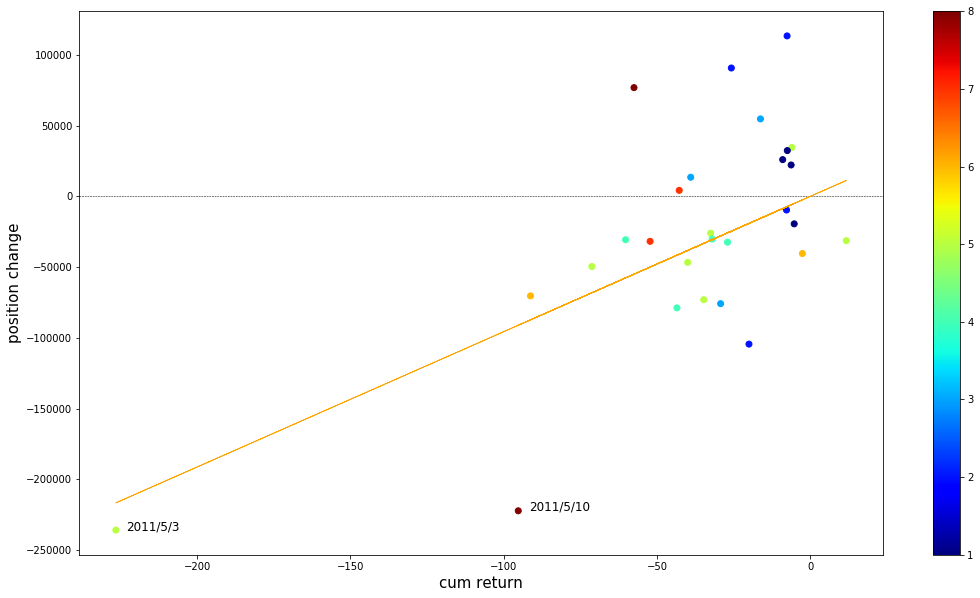

In [332]:
plot_df(to_plot)

In [341]:
to_plot1 = get_neg_range_days(dictionary_financials["10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE"]\
['Change_in_Net_Positioning_Asset_Mgr'], df["ten_tnote_futeres_price"], 5, 10)

                   Results: Ordinary least squares
Model:               OLS               Adj. R-squared:      0.216     
Dependent Variable:  position_change   AIC:                 1058.6838 
Date:                2018-05-14 00:29  BIC:                 1060.4450 
No. Observations:    43                Log-Likelihood:      -528.34   
Df Model:            1                 F-statistic:         12.83     
Df Residuals:        42                Prob (F-statistic):  0.000880  
R-squared:           0.234             Scale:               2.8191e+09
----------------------------------------------------------------------
                 Coef.     Std.Err.   t    P>|t|    [0.025    0.975]  
----------------------------------------------------------------------
neg_return_cum 17061.0998 4763.6578 3.5815 0.0009 7447.6491 26674.5504
----------------------------------------------------------------------
Omnibus:                 2.121         Durbin-Watson:            1.631
Prob(Omnibus):           0

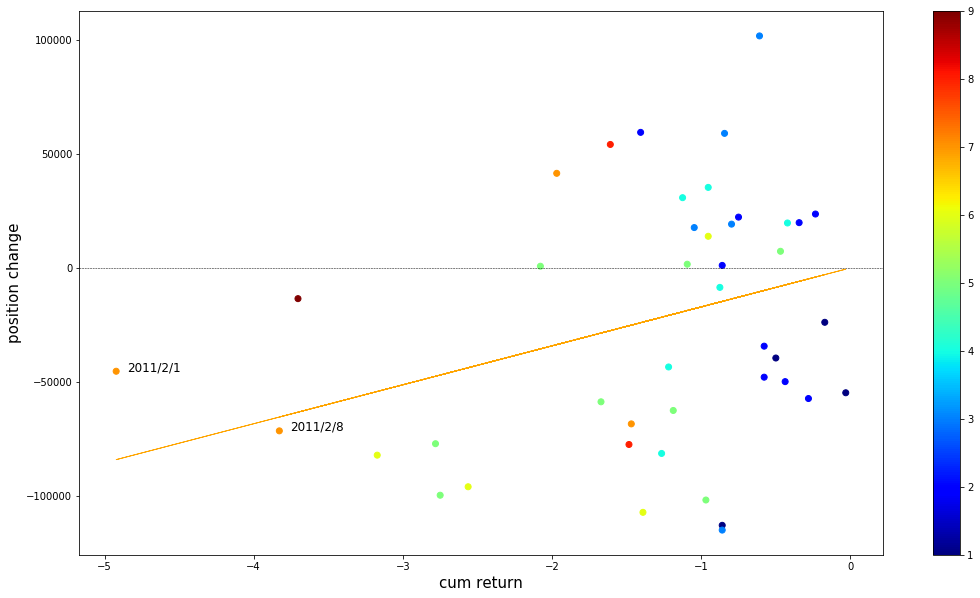

In [342]:
plot_df(to_plot1)

In [343]:
to_plot2 = get_neg_range_days(dictionary_commodities["COFFEE C - ICE FUTURES U.S."]\
["Change_in_Net_Positioning_MM"], df["coffee_futeres_price"], 5, 10)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.480     
Dependent Variable: position_change  AIC:                1036.7151 
Date:               2018-05-14 00:29 BIC:                1038.6663 
No. Observations:   52               Log-Likelihood:     -517.36   
Df Model:           1                F-statistic:        48.99     
Df Residuals:       51               Prob (F-statistic): 5.46e-09  
R-squared:          0.490            Scale:              2.6164e+07
-------------------------------------------------------------------
                   Coef.   Std.Err.   t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
neg_return_cum    447.0511  63.8722 6.9991 0.0000 318.8223 575.2799
-------------------------------------------------------------------
Omnibus:               6.065         Durbin-Watson:           2.108
Prob(Omnibus):         0.048         Jarque-Bera (JB):        5.22

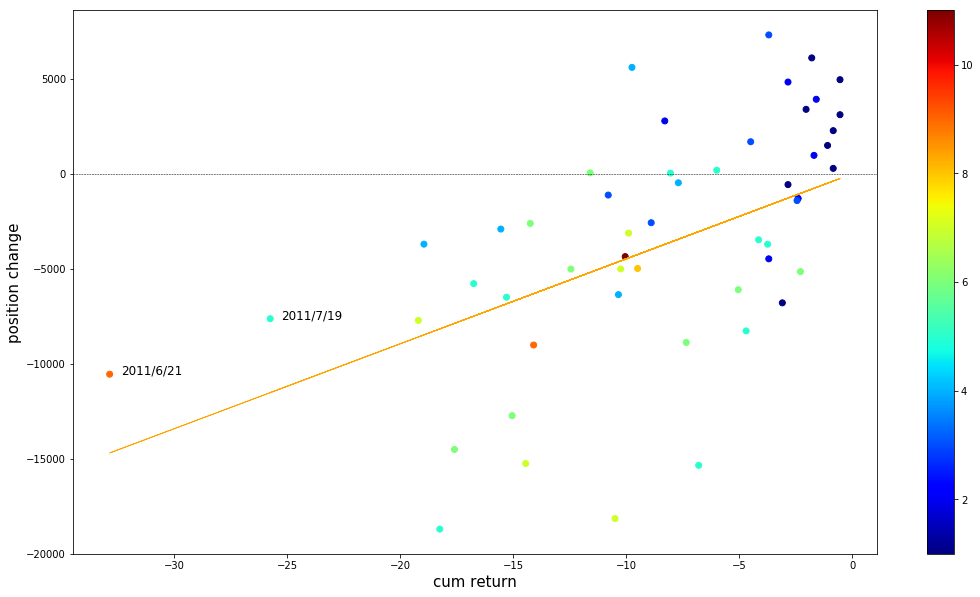

In [344]:
plot_df(to_plot2)